In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from os.path import dirname, join
import numpy as np
#import click
#import snakemake
from src.utils.data_io import af_to_vireo
from icecream import ic


import seaborn as sns
import matplotlib.pyplot as plt

fig_utils from mplh


In [2]:
from src.utils import impute_af as imp

In [3]:
#cells_meta = "/mnt/md0/isshamie/Projects/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/multiplex/cells_meta.tsv"


#sample = "Input,Flt3l"#["Input","Flt3l"]
# pileup_d = "/mnt/md0/isshamie/Projects/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/multiplex/clones_init/donor0"
# outdir = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/multiplex/clones_prefilterMerge_impute/donor0"

cell_pct_cov_thresh = 0.6
cov_thresh = 10


alt_thresh = [{"cell_pct_cov_thresh":0.4, "cov_thresh": 10}, 
             {"cell_pct_cov_thresh":0.8, "cov_thresh": 10},
             {"cell_pct_cov_thresh":0.7, "cov_thresh": 30}, 
             {"cell_pct_cov_thresh":0.6, "cov_thresh": 30}]


pileup_d = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/coverage_merged/donor1/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk"
outdir="/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/multiplex/clones_prefilterMerge_impute/donor1"
sample = "Input,Flt3l"#["Input","Flt3l"]


ref_mt = "/data/Mito_Trace/data/external/chrM_refAllele.txt"

In [4]:
sample = sample.split(",")

In [5]:
# cmd = f"cp {cells_meta} {join(outdir, 'cells_meta.tsv')}"
# print(cmd)
# !{cmd}


In [6]:
#cells_meta = pd.read_csv(cells_meta , sep='\t')
#sample = sample.split(',')
#ref_fa = pd.read_csv(ref_mt, sep='\t', header=None, index_col=0)

In [7]:
af_pile = pd.read_csv(join(pileup_d, f"merged.af.tsv"), sep="\t", index_col=0).transpose()
dp_pile = pd.read_csv(join(pileup_d, f"merged.coverage.tsv"), sep="\t", index_col=0).transpose()

af_pile.columns = [f"{x.split('>')[0][:-1]}{x[-1]}" for x in af_pile.columns]
dp_pile.columns = [f"{x.split('>')[0][:-1]}{x[-1]}" for x in dp_pile.columns]
af_pile.index.name = "Cell"
dp_pile.index.name = "Cell"
#af_pile.columns.name = "Variant"


In [8]:
af_pile

,1949A,2514A,3242A,3244A,3630A,4837A,6456A,7598A,7775A,8292A,...,3735T,5273T,7361T,8461T,8770T,11761T,12283T,13188T,16296T,16355T
Cell,,,,,,,,,,,,,,,,,,,,,
AAACGAAAGATATGAC-1_Input,0.000000,0.000000,0.0,0.007092,0.000000,0.000000,0.0,0.0,0.000000,0.030303,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00641,0.000000,1.0,0.0
AAACGAAAGTAATGTG-1_Input,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.022472,0.000000,0.00000,0.000000,1.0,0.0
AAACGAAAGTAGTCGG-1_Input,0.031746,0.000000,0.0,0.000000,0.000000,0.014085,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.0,0.0
AAACGAACACATTGCA-1_Input,0.015306,0.006329,0.0,0.000000,0.000000,0.010417,0.0,0.0,0.000000,0.000000,...,0.000000,0.020408,0.021053,0.000000,0.000000,0.000000,0.00000,0.000000,1.0,0.0
AAACGAAGTGGTTCTA-1_Input,0.000000,0.009217,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.025641,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTCAATGACTC-1_Input,0.000000,0.000000,0.0,0.000000,0.021277,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.024793,0.000000,0.056338,0.00000,0.000000,0.0,0.0
TTTGTGTCAGAAAGAG-1_Input,0.000000,0.007353,0.0,0.000000,0.014286,0.000000,0.0,0.0,0.000000,0.000000,...,0.008333,0.000000,0.000000,0.009174,0.000000,0.000000,0.00000,0.000000,1.0,0.0
TTTGTGTCATAGCCAT-1_Input,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.019608,0.000000,0.000000,0.00000,0.073171,1.0,0.0


## ?Find if it's the imputation.. dont i need to do that per donor? 

## Impute the new data:
### If coverage less than 10, and >80% have coverage, then impute the median of the cells with coverage onto the low coverage cells (do i need to set depth to 10?)

In [9]:
af_pile

,1949A,2514A,3242A,3244A,3630A,4837A,6456A,7598A,7775A,8292A,...,3735T,5273T,7361T,8461T,8770T,11761T,12283T,13188T,16296T,16355T
Cell,,,,,,,,,,,,,,,,,,,,,
AAACGAAAGATATGAC-1_Input,0.000000,0.000000,0.0,0.007092,0.000000,0.000000,0.0,0.0,0.000000,0.030303,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00641,0.000000,1.0,0.0
AAACGAAAGTAATGTG-1_Input,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.022472,0.000000,0.00000,0.000000,1.0,0.0
AAACGAAAGTAGTCGG-1_Input,0.031746,0.000000,0.0,0.000000,0.000000,0.014085,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.0,0.0
AAACGAACACATTGCA-1_Input,0.015306,0.006329,0.0,0.000000,0.000000,0.010417,0.0,0.0,0.000000,0.000000,...,0.000000,0.020408,0.021053,0.000000,0.000000,0.000000,0.00000,0.000000,1.0,0.0
AAACGAAGTGGTTCTA-1_Input,0.000000,0.009217,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.025641,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTCAATGACTC-1_Input,0.000000,0.000000,0.0,0.000000,0.021277,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.024793,0.000000,0.056338,0.00000,0.000000,0.0,0.0
TTTGTGTCAGAAAGAG-1_Input,0.000000,0.007353,0.0,0.000000,0.014286,0.000000,0.0,0.0,0.000000,0.000000,...,0.008333,0.000000,0.000000,0.009174,0.000000,0.000000,0.00000,0.000000,1.0,0.0
TTTGTGTCATAGCCAT-1_Input,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.019608,0.000000,0.000000,0.00000,0.073171,1.0,0.0


In [10]:
dp_pile

,1949A,2514A,3242A,3244A,3630A,4837A,6456A,7598A,7775A,8292A,...,3735T,5273T,7361T,8461T,8770T,11761T,12283T,13188T,16296T,16355T
Cell,,,,,,,,,,,,,,,,,,,,,
AAACGAAAGATATGAC-1_Input,185,370,276,282,206,234,227,145,208,198,...,277,324,180,199,256,284,312,212,171,199
AAACGAAAGTAATGTG-1_Input,122,211,165,175,125,195,124,90,105,142,...,95,221,139,121,89,144,109,130,70,78
AAACGAAAGTAGTCGG-1_Input,126,156,187,190,135,142,101,88,141,57,...,74,181,135,113,113,89,177,121,78,52
AAACGAACACATTGCA-1_Input,196,316,276,285,197,192,141,142,173,181,...,167,294,190,171,167,188,192,203,104,120
AAACGAAGTGGTTCTA-1_Input,169,217,179,179,199,212,183,157,147,156,...,152,282,180,144,151,150,171,178,114,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTCAATGACTC-1_Input,83,117,110,114,94,100,94,77,125,56,...,76,109,139,121,125,71,119,91,64,71
TTTGTGTCAGAAAGAG-1_Input,175,272,337,342,140,209,224,116,194,170,...,240,336,169,218,165,184,241,205,160,174
TTTGTGTCATAGCCAT-1_Input,73,143,101,107,63,76,91,46,93,85,...,59,120,85,102,72,76,93,82,49,47


before filt (161837, 3)
after filt, low cov (7, 3)


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


n vars imputed 3
{'196C': 0.004256573619985889, '10397G': 0.005536559340865292, '146C': 0.005625932811077116}


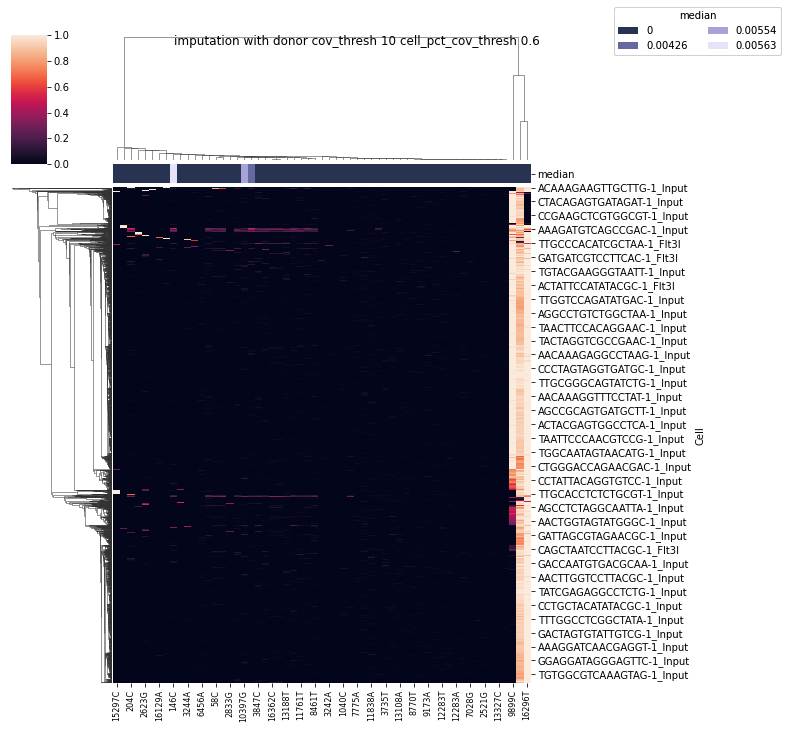

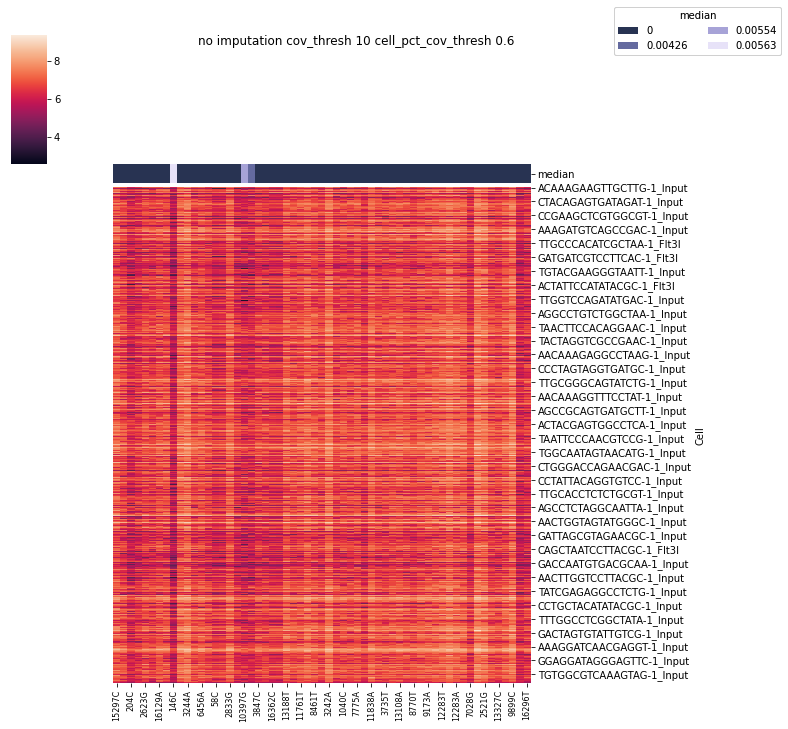

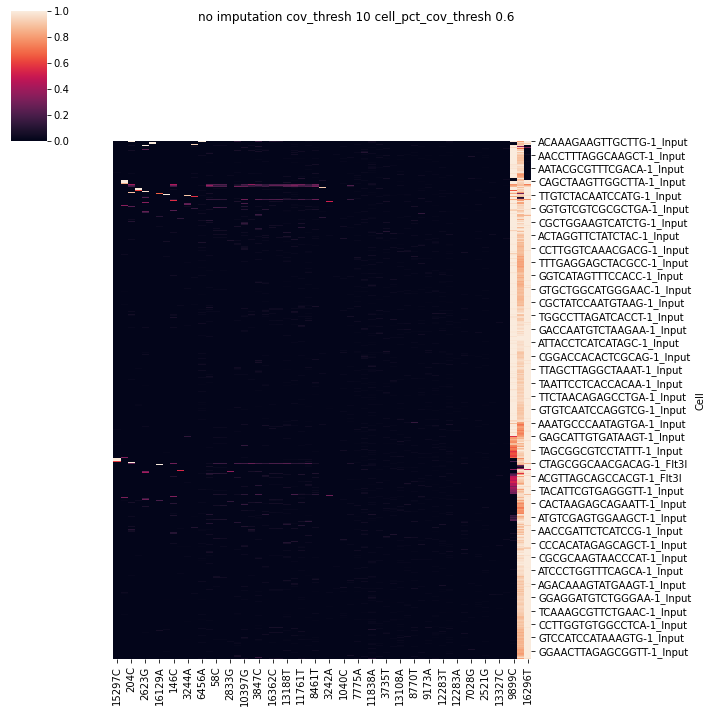

In [11]:
imp_out = imp.impute_and_plot(af_pile, dp_pile, cov_thresh=cov_thresh, cell_pct_cov_thresh=cell_pct_cov_thresh,
                             include_orig=True)

#print(imp_out["imputed_indices"])
print(imp_out["median_d"])

In [12]:
dp_pile.head()

,1949A,2514A,3242A,3244A,3630A,4837A,6456A,7598A,7775A,8292A,...,3735T,5273T,7361T,8461T,8770T,11761T,12283T,13188T,16296T,16355T
Cell,,,,,,,,,,,,,,,,,,,,,
AAACGAAAGATATGAC-1_Input,185,370,276,282,206,234,227,145,208,198,...,277,324,180,199,256,284,312,212,171,199
AAACGAAAGTAATGTG-1_Input,122,211,165,175,125,195,124,90,105,142,...,95,221,139,121,89,144,109,130,70,78
AAACGAAAGTAGTCGG-1_Input,126,156,187,190,135,142,101,88,141,57,...,74,181,135,113,113,89,177,121,78,52
AAACGAACACATTGCA-1_Input,196,316,276,285,197,192,141,142,173,181,...,167,294,190,171,167,188,192,203,104,120
AAACGAAGTGGTTCTA-1_Input,169,217,179,179,199,212,183,157,147,156,...,152,282,180,144,151,150,171,178,114,92


In [13]:
imp_out["impute_af"].shape

(2743, 59)

In [14]:
imp_out["impute_af"].to_csv(join(outdir, "af.tsv"), sep="\t")
dp_pile.loc[imp_out["impute_af"].index, imp_out["impute_af"].columns].to_csv(join(outdir, "dp.tsv"), sep="\t")

before filt (161837, 3)
after filt, low cov (7, 3)


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


n vars imputed 3
before filt (161837, 3)
after filt, low cov (7, 3)
n vars imputed 3
before filt (161837, 3)
after filt, low cov (1877, 3)
n vars imputed 51
before filt (161837, 3)
after filt, low cov (1877, 3)
n vars imputed 51


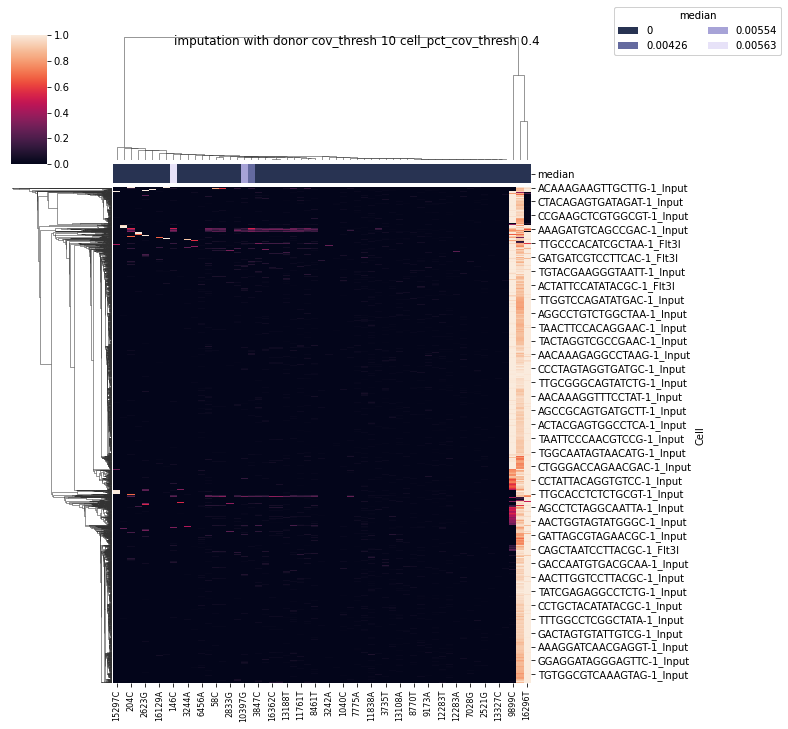

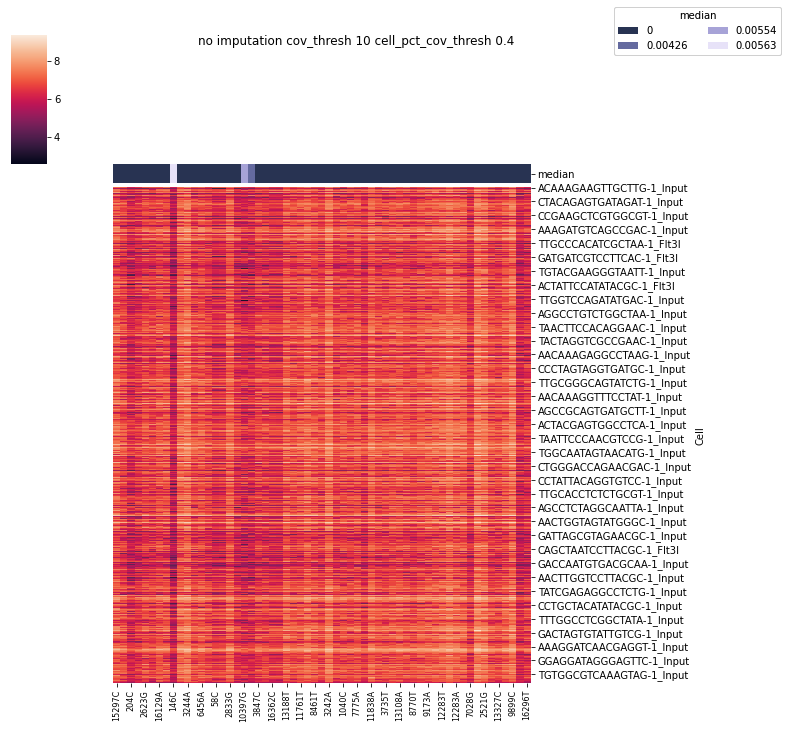

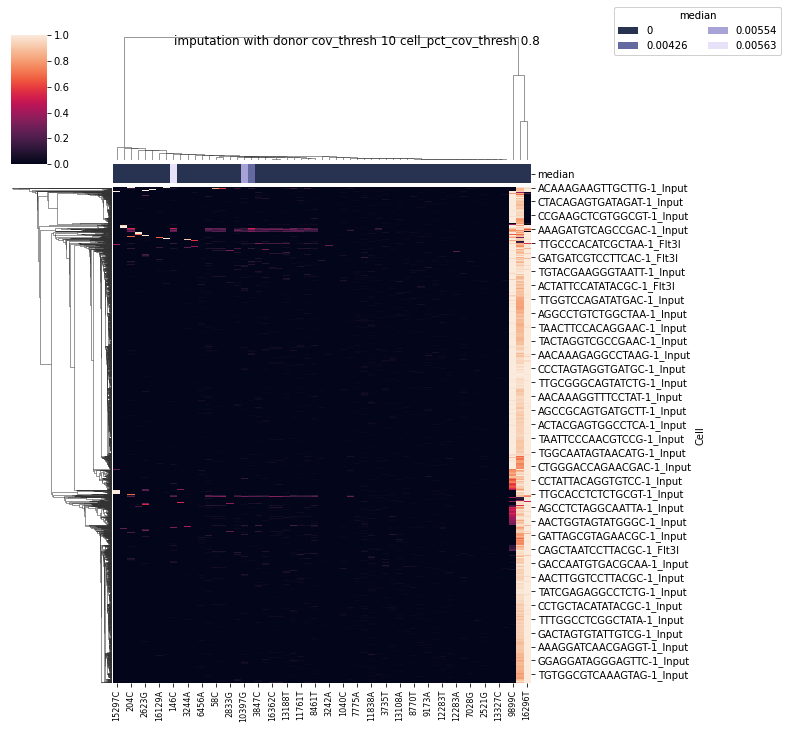

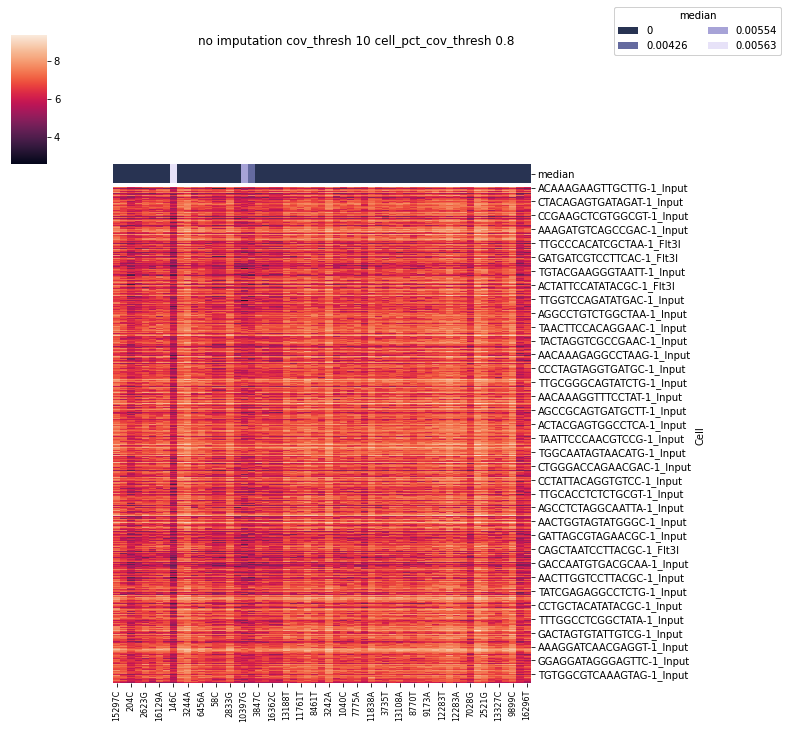

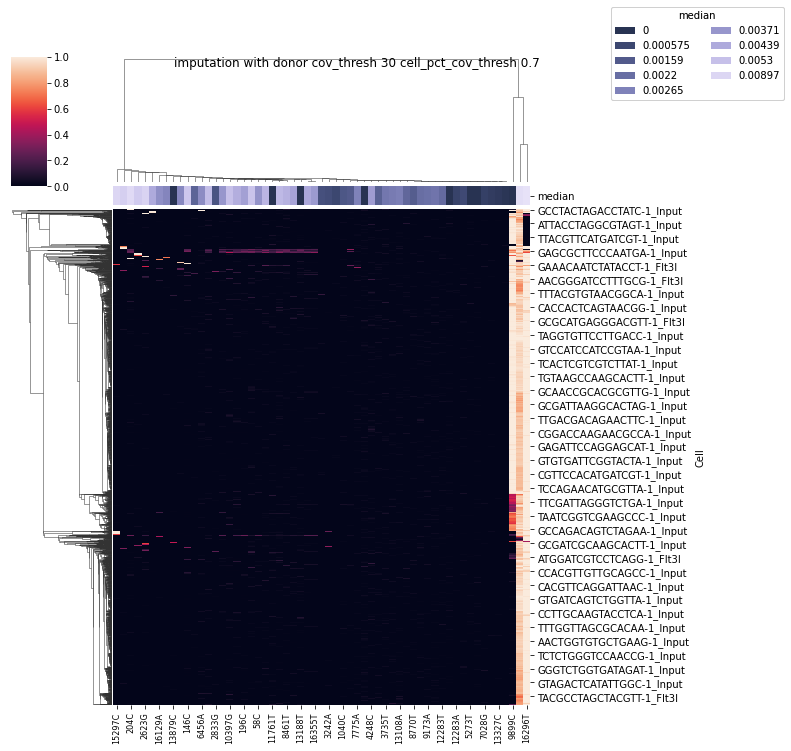

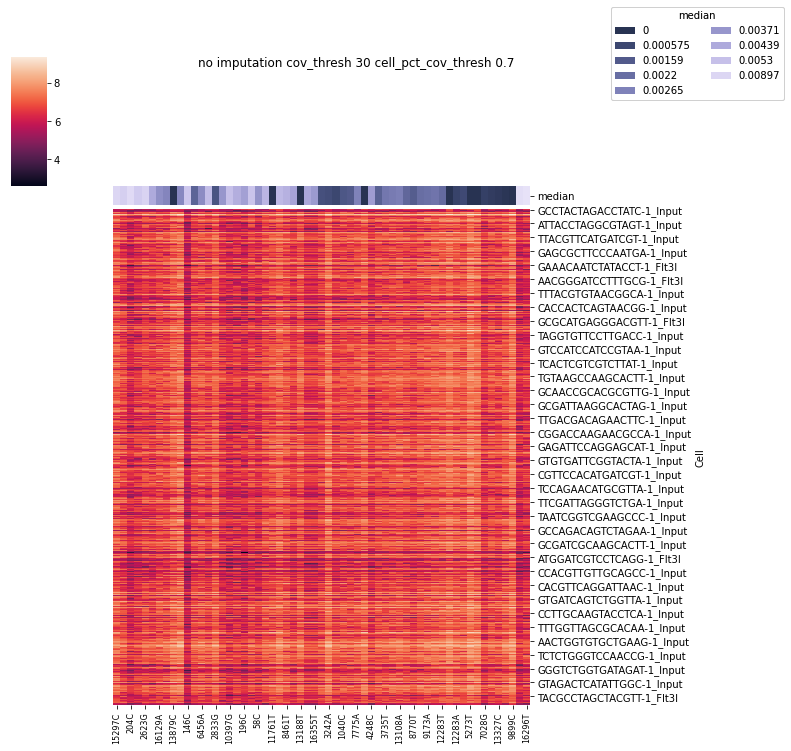

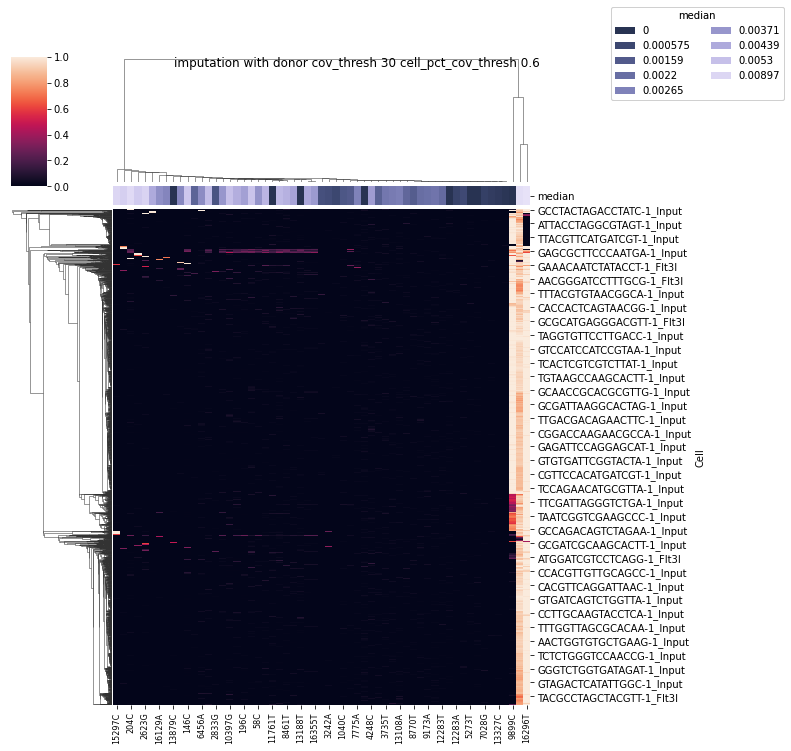

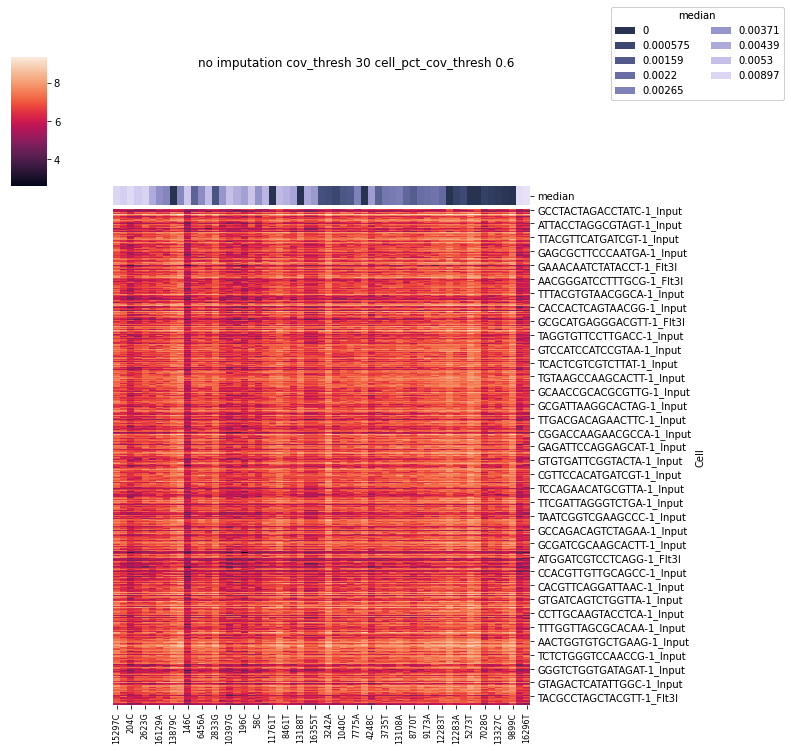

In [15]:
for k in alt_thresh:
    curr_cell_pct_cov_thresh, curr_cov_thresh = k["cell_pct_cov_thresh"], k["cov_thresh"]
    curr_imp_out = imp.impute_and_plot(af_pile, dp_pile, 
                                       cov_thresh=curr_cov_thresh, cell_pct_cov_thresh=curr_cell_pct_cov_thresh,
                                       include_orig=False)    

## Save output - af.tsv and dp.tsv

In [16]:
# cell_pct_cov_thresh = 0.4
# cov_thresh = 10
# imp_out = imp.impute_and_plot(af_pile, dp_pile, cov_thresh=cov_thresh, cell_pct_cov_thresh=cell_pct_cov_thresh,
#                              include_orig=True)

# #print(imp_out["imputed_indices"])
# print(imp_out["median_d"])

# cell_pct_cov_thresh = 0.8
# cov_thresh = 10
# imp_out = imp.impute_and_plot(af_pile, dp_pile, cov_thresh=cov_thresh, 
#                               cell_pct_cov_thresh=cell_pct_cov_thresh, include_orig=True)

# #print("number of variants imputed", len(imp_out["median_d"]))
# #print(imp_out["imputed_indices"])
# print(imp_out["median_d"])
# # diff_vars_impute = np.abs(imp_df-af_pile).sum().sort_values()[::-1]
# # print(diff_vars_impute)
# # if not (np.abs(imp_df-af_pile).sum().sort_values()[::-1].sum()==0):

# #     diff_vars_impute = diff_vars_impute.index
# #     _, g_pile = impute_and_plot(af_pile.loc[:, diff_vars_impute[:20]], 
# #                                 dp_pile.loc[:, diff_vars_impute[:20]], cov_thresh=cov_thresh, cell_pct_cov_thresh=cell_pct_cov_thresh)
# # else:
# #     print('no imputation done')

# cell_pct_cov_thresh = 0.7
# cov_thresh = 30
# imp_out = imp.impute_and_plot(af_pile, dp_pile, cov_thresh=cov_thresh, 
#                               cell_pct_cov_thresh=cell_pct_cov_thresh, include_orig=True)

# #print("number of variants imputed", len(imp_out["median_d"]))
# #print(imp_out["imputed_indices"])
# print(imp_out["median_d"])


# cell_pct_cov_thresh = 0.6
# cov_thresh = 30
# imp_out = imp.impute_and_plot(af_pile, dp_pile, cov_thresh=cov_thresh, 
#                               cell_pct_cov_thresh=cell_pct_cov_thresh, include_orig=True)

# #print("number of variants imputed", len(imp_out["median_d"]))
# #print(imp_out["imputed_indices"])
# print(imp_out["median_d"])



In [17]:
# from mplh import cluster_help as ch
# ch.plot_cluster(df=imp_out["impute_af"], 
#                 col_meta=pd.DataFrame(imp_out["median_d"], index=["median"]).transpose(),
#                 col_clr_schemes="sequential")

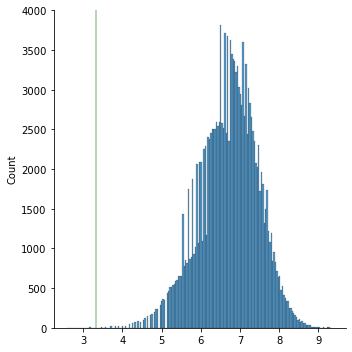

In [18]:
flat_dp = dp_pile.values.flatten()
flat_dp = flat_dp[flat_dp!=0]
sns.displot(np.log2(1+flat_dp))
#plt.gca().set_ylim([0, 400000])
plt.axvline(np.log2(10), color='green', alpha=0.4)